# MEEN 689 HOMEWORK 2
Name: Chinonyelum Okereafor

UIN: 733001665

1. Q1 Sheet contains the data of 14 students’ exam scores across five sections (of
the same course). It is of interest to know if the student performances are different
across the sections. For this, you will perform a One-Way ANOVA, assuming score
distribution follows a normal distribution.

In [201]:
#Importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import f
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")

In [202]:
#Reading the Excel file Q1 sheet into Python
df1 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 2/HW2 data.xlsx',
                    sheet_name = 'Q1')
df1.set_index('Student #', inplace=True)
df1=df1.iloc[:14]
print(df1)

           Section 1  Section 2  Section 3  Section 4  Section 5
Student #                                                       
1          90.633333  92.166667  94.463333  93.390000  95.633333
2          91.366667  90.666667  91.666667  94.183333  90.533333
3          91.233333  87.933333  93.223333  92.900000  91.300000
4          91.300000  87.566667  91.666667  95.853333  91.500000
5          92.033333  87.933333  91.446667  91.253333  95.633333
6          88.800000  87.900000  91.666667  87.283333  90.533333
7          90.200000  88.566667  91.446667  94.183333  91.500000
8          88.800000  87.633333  93.223333  87.283333  91.500000
9          91.366667  88.566667  93.223333  92.900000  91.300000
10         90.833333  91.233333  94.463333  93.390000  91.500000
11         90.200000  88.066667  91.446667  91.253333  91.300000
12         88.633333  87.933333  93.223333  91.253333  90.533333
13         88.566667  91.066667  94.090000  94.183333  95.633333
14         88.800000  92.

a. Use R, Excel, MiniTab or MATLAB to perform one-way ANOVA and list the result in
ANOVA table.

In [203]:
# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(df1['Section 1'],df1['Section 2'], df1['Section 3'], df1['Section 4'], df1['Section 5'])

# Reshape the data into long format by stacking all the columns into one
stacked_data = df1.melt(var_name='Section', value_name='Score')

# Calculate the within-group sum of squares (SSW)
SSW = sum((stacked_data['Score'] - stacked_data.groupby('Section')['Score'].transform('mean')) ** 2)

# Calculate sum of squares between groups (SSB)
overall_mean = stacked_data['Score'].mean()# Calculate the overall mean
group_means = stacked_data.groupby('Section')['Score'].mean()
group_counts = stacked_data.groupby('Section')['Score'].count()
SSB = sum(group_counts * (group_means - overall_mean) ** 2)

#Calculate Mean of Squares between groups
MS_between = SSB / (df1.shape[1] - 1)

#Calculate Mean of Squares within groups
MS_within = SSW / (df1.shape[0] - df1.shape[1])

# Create an ANOVA table
anova_table = pd.DataFrame({
    "Source of Variation": ["Between Groups", "Within Groups"],
    "Sum of Squares": [SSB,SSW],
    "Degrees of Freedom": [df1.shape[1] - 1, df1.shape[0] - df1.shape[1]],
    "Mean Squares": [MS_between, MS_within],
    "F-statistic": [f_stat, None],
    "p-value": [p_value, None],
    # Assuming 95% confidence level, same value from the table
    "F-critical": [f.ppf(1 - 0.05, df1.shape[1] - 1, df1.shape[0] - df1.shape[1]), None] 
})

# Print the ANOVA table
anova_table

,Source of Variation,Sum of Squares,Degrees of Freedom,Mean Squares,F-statistic,p-value,F-critical
0,Between Groups,131.880578,4,32.970144,10.263784,0.000002,3.633089
1,Within Groups,208.798175,9,23.199797,NaN,NaN,NaN


b. Use the F-table to confirm the F-critical value at 95% confidence. (i.e., what are df1 and df2 to find the value?)

In [204]:
#Degrees of Freedom
dof1 = df1.shape[1] - 1
dof2 = df1.shape[0] - df1.shape[1]

# F-critical value at 95% confidence (alpha = 0.05)
f_critical = f.ppf(1 - 0.05, dof1, dof2)

print("F-critical =", f_critical)
print("Degrees of freedom 1 (Between groups) =", dof1)
print("Degrees of freedom 2 (Within groups) =", dof2)

F-critical = 3.6330885114190794
Degrees of freedom 1 (Between groups) = 4
Degrees of freedom 2 (Within groups) = 9


c. Based on the ANOVA output, what can you conclude statistically?

**Explanation:**

Based on the ANOVA output, the **F-statistic** for the comparison between groups is **10.263784**, with a **p-value** of **0.000002**. Since the p-value is much smaller than the significance level (typically 0.05), we reject the null hypothesis, indicating that there are statistically significant differences between the groups.

The **F-critical** value of **3.633089** is also less than the calculated **F-statistic**, reinforcing the conclusion that at least one group is significantly different from the others in terms of the measured outcome. Therefore, we can conclude that the differences **between groups** are statistically significant.

d. Conduct Tukey’s test for pairwise comparison and show the results.

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
Section 1 Section 2  -0.9548 0.6239 -2.8555  0.946  False
Section 1 Section 3   2.6124 0.0024  0.7117 4.5131   True
Section 1 Section 4   2.1031 0.0228  0.2024 4.0038   True
Section 1 Section 5   1.9381 0.0435  0.0374 3.8388   True
Section 2 Section 3   3.5671    0.0  1.6664 5.4679   True
Section 2 Section 4   3.0579 0.0003  1.1571 4.9586   True
Section 2 Section 5   2.8929 0.0006  0.9921 4.7936   True
Section 3 Section 4  -0.5093 0.9432   -2.41 1.3914  False
Section 3 Section 5  -0.6743 0.8565  -2.575 1.2264  False
Section 4 Section 5   -0.165 0.9992 -2.0657 1.7357  False
---------------------------------------------------------


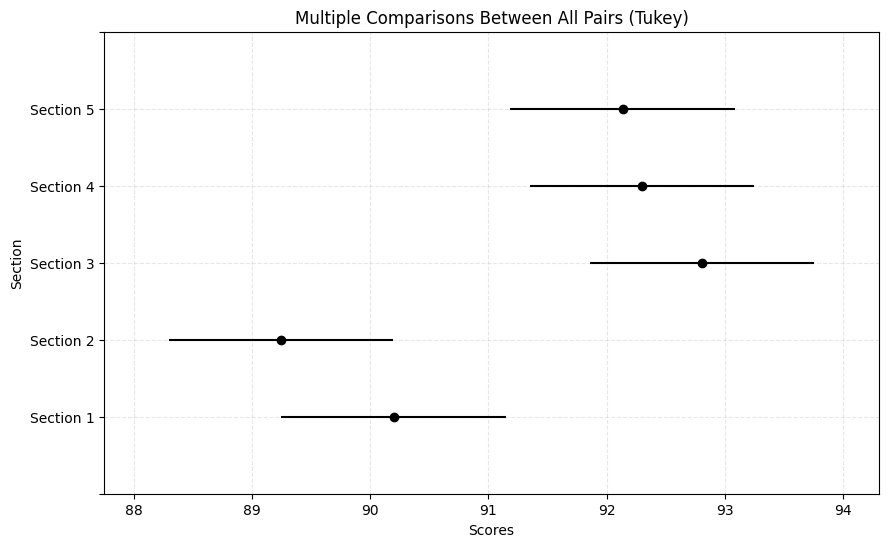

In [205]:
# Reshape the data into long format by stacking all the columns into one
data1 = df1.melt(var_name='Section', value_name='Score')

# Perform Tukey's HSD (Honestly Significant Different) test
tukey = pairwise_tukeyhsd(endog=data1['Score'], groups=data1['Section'], alpha=0.05)

# Print the results
print(tukey)

#Plot the results
tukey.plot_simultaneous()
plt.xlabel('Scores')
plt.ylabel('Section')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

e. Following part d, what can you conclude statistically?

**Interpretation:**

**Reject Column:** If the **"reject"** column is **True**, it means that the difference between the means of the two groups is statistically significant at the 0.05 level.

In this case, the pairs:

**Sections 1 and 2:** The mean difference is ***not*** statistically significant (p-adj = 0.6239, **"False"** in the reject column), indicating that there is no significant difference between Sections 1 and 2.

**Sections 1 and 3, 1 and 4, and 1 and 5:** There are statistically significant differences (p-adj values < 0.05, **"True"** in the reject column), meaning Sections 1 and 3, 1 and 4, and 1 and 5 are significantly different from each other.

**Sections 2 and 3, 2 and 4, and 2 and 5:** These comparisons are statistically significant (p-adj values < 0.05, **"True"** in the reject column), indicating significant differences between these section pairs.

**Sections 3 and 4, 3 and 5, 4 and 5:** These comparisons are ***not*** statistically significant (p-adj values > 0.05, **"False"** in the reject column), indicating no significant differences between these section pairs.

**Conclusion:**

There are significant differences between several sections (especially between Section 1 and other sections, and between Section 2 and other sections), but Sections 3, 4, and 5 tend to have more similar outcomes as they do ***not*** show statistically significant differences between each other.

2. Q2 data sheet contains data to study the effect of Diet (e.g., X, Y and Z) on
chickens’ weight gain in a farm. Since chickens are raised in different cages, a block
design is used to avoid extraneous factors due to cage-to-cage variation. Therefore,
every cage is fed with all three diets (X, Y and Z) as shown in the dataset.

In [206]:
#Reading the Excel file Q2 sheet into Python
df2 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 2/HW2 data.xlsx',
                    sheet_name = 'Q2')
df2

,Cage,Diet X (Weight Gain in grams),Diet Y (Weight Gain in grams),Diet Z (Weight Gain in grams)
0,1,50,55,52
1,1,53,57,54
2,1,51,56,53
3,1,52,58,55
4,2,60,62,61
5,2,62,63,64
6,2,59,61,60
7,2,61,64,63
8,3,70,68,69
9,3,72,71,70


In [207]:
#Reading the Excel file Q2 sheet into Python
df2_sorted = pd.read_excel(
    '/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 2/HW2 data.xlsx', 
    sheet_name = 'Sorted_Q2')
df2_sorted

,Block,Factor,Value
0,1,Diet X (Weight Gain in grams),50
1,2,Diet X (Weight Gain in grams),60
2,3,Diet X (Weight Gain in grams),70
3,4,Diet X (Weight Gain in grams),80
4,1,Diet X (Weight Gain in grams),53
5,2,Diet X (Weight Gain in grams),62
6,3,Diet X (Weight Gain in grams),72
7,4,Diet X (Weight Gain in grams),79
8,1,Diet X (Weight Gain in grams),51
9,2,Diet X (Weight Gain in grams),59


a. Sort out the data properly and use R, MiniTab or MATLAB to perform one-way
ANOVA with a block design. List the result in ANOVA table.

In [208]:
#Sorting the Data as required for ANOVA with a block design
data2 = pd.DataFrame({
    'Block': pd.concat([df2_sorted['Block'].astype('category')]).reset_index(drop=True),
    'Factor': pd.concat([df2_sorted['Factor'].astype('category')]).reset_index(drop=True),
    'Value': pd.concat([df2_sorted['Value']]).reset_index(drop=True)
})
# Fit the ANOVA model using OLS with Cage as the blocking factor
model2 = ols('Value ~ Factor + Block', data=data2).fit()

# Perform ANOVA and create the ANOVA table
anova_table2 = sm.stats.anova_lm(model2, typ=2)

# Display the ANOVA table
print(anova_table2)

               sum_sq    df           F        PR(>F)
Factor      16.791667   2.0    3.228920  4.961236e-02
Block     4236.666667   3.0  543.120946  1.317275e-33
Residual   109.208333  42.0         NaN           NaN


b. Based on the result, what can you conclude statistically?

Based on the ANOVA results, the Factor effect has a p-value of **0.04961236**, which is slightly less than **0.05**, indicating that the different diets have a statistically significant effect on the weight gain at the 5% significance level.

Meanwhile, the Block effect has an extremely small p-value (**1.317275e-33**), suggesting that the variation due to the cages is highly significant.

Therefore, both the **Factor** and **Block** contribute to the observed variation, but the **Block effect is far more significant than the Factor effect**.








Now, let’s try a different way to analyze:

c. Perform one-way ANOVA for each cage and show the results.

In [209]:
#Dataframes for each cage
anov_cage1 = df2_sorted[df2_sorted['Block'] == 1]
anov_cage2 = df2_sorted[df2_sorted['Block'] == 2]
anov_cage3 = df2_sorted[df2_sorted['Block'] == 3]
anov_cage4 = df2_sorted[df2_sorted['Block'] == 4]

#Viewing the dataframe for each cages
print("Dataframe for Cage 1:")
print(anov_cage1)
print("Dataframe for Cage 2:")
print(anov_cage2)
print("Dataframe for Cage 3:")
print(anov_cage3)
print("Dataframe for Cage 4:")
print(anov_cage4)

Dataframe for Cage 1:
    Block                         Factor  Value
0       1  Diet X (Weight Gain in grams)     50
4       1  Diet X (Weight Gain in grams)     53
8       1  Diet X (Weight Gain in grams)     51
12      1  Diet X (Weight Gain in grams)     52
16      1  Diet Y (Weight Gain in grams)     55
20      1  Diet Y (Weight Gain in grams)     57
24      1  Diet Y (Weight Gain in grams)     56
28      1  Diet Y (Weight Gain in grams)     58
32      1  Diet Z (Weight Gain in grams)     52
36      1  Diet Z (Weight Gain in grams)     54
40      1  Diet Z (Weight Gain in grams)     53
44      1  Diet Z (Weight Gain in grams)     55
Dataframe for Cage 2:
    Block                         Factor  Value
1       2  Diet X (Weight Gain in grams)     60
5       2  Diet X (Weight Gain in grams)     62
9       2  Diet X (Weight Gain in grams)     59
13      2  Diet X (Weight Gain in grams)     61
17      2  Diet Y (Weight Gain in grams)     62
21      2  Diet Y (Weight Gain in grams)    

**ANOVA For cage 1**

In [210]:
# Perform one-way ANOVA for Cage 1
# Convert 'Factor' column to numerical representation using pd.factorize()
factor_labels, unique_levels = pd.factorize(anov_cage1['Factor'])
f_stat, p_value = stats.f_oneway(factor_labels, anov_cage1['Value'])

F_STAT = f_stat
P_VALUE = p_value

# Calculate the within-group sum of squares (SSW)
SSW = sum((anov_cage1['Value'] - anov_cage1.groupby('Factor')['Value'].transform('mean')) ** 2)

# Calculate sum of squares between groups (SSB)
overall_mean = anov_cage1['Value'].mean()# Calculate the overall mean
group_means = anov_cage1.groupby('Factor')['Value'].mean()
group_counts = anov_cage1.groupby('Factor')['Value'].count()
SSB = sum(group_counts * (group_means - overall_mean) ** 2)

#Calculate Mean of Squares between groups
MS_between = SSB / (len(group_means) - 1) 

#Calculate Mean of Squares within groups
MS_within = SSW / (anov_cage1.shape[0] - len(group_means)) 

# Create an ANOVA table
anova_table_cage1 = pd.DataFrame({
    "Source of Variation": ["Factor", "Residual"],
    "Sum of Squares": [SSB,SSW],
    "Degrees of Freedom": [len(group_means) - 1, anov_cage1.shape[0] - len(group_means)], 
    "Mean Squares": [MS_between, MS_within],
    "F-statistic": [MS_between/MS_within, None],
    "p-value": [stats.f.sf(MS_between/MS_within, len(group_means) - 1, anov_cage1.shape[0] - len(group_means)), None],
    "F-critical": [f.ppf(1 - 0.05, len(group_means) - 1, anov_cage1.shape[0] - len(group_means)), None]  
})


# Print the ANOVA table
anova_table_cage1

,Source of Variation,Sum of Squares,Degrees of Freedom,Mean Squares,F-statistic,p-value,F-critical
0,Factor,50.666667,2,25.333333,15.2,0.001301,4.256495
1,Residual,15.000000,9,1.666667,NaN,NaN,NaN


**ANOVA For cage 2**

In [211]:
# Perform one-way ANOVA for Cage 2
# Convert 'Factor' column to numerical representation using pd.factorize()
factor_labels, unique_levels = pd.factorize(anov_cage2['Factor'])
f_stat, p_value = stats.f_oneway(factor_labels, anov_cage2['Value'])

F_STAT = f_stat
P_VALUE = p_value

# Calculate the within-group sum of squares (SSW)
SSW = sum((anov_cage2['Value'] - anov_cage2.groupby('Factor')['Value'].transform('mean')) ** 2)

# Calculate sum of squares between groups (SSB)
overall_mean = anov_cage2['Value'].mean()# Calculate the overall mean
group_means = anov_cage2.groupby('Factor')['Value'].mean()
group_counts = anov_cage2.groupby('Factor')['Value'].count()
SSB = sum(group_counts * (group_means - overall_mean) ** 2)

#Calculate Mean of Squares between groups
MS_between = SSB / (len(group_means) - 1) 

#Calculate Mean of Squares within groups
MS_within = SSW / (anov_cage2.shape[0] - len(group_means)) 

# Create an ANOVA table
anova_table_cage2 = pd.DataFrame({
    "Source of Variation": ["Factor", "Residual"],
    "Sum of Squares": [SSB,SSW],
    "Degrees of Freedom": [len(group_means) - 1, anov_cage2.shape[0] - len(group_means)], 
    "Mean Squares": [MS_between, MS_within],
    "F-statistic": [MS_between/MS_within, None],
    "p-value": [stats.f.sf(MS_between/MS_within, len(group_means) - 1, anov_cage2.shape[0] - len(group_means)), None],
    "F-critical": [f.ppf(1 - 0.05, len(group_means) - 1, anov_cage2.shape[0] - len(group_means)), None]  
})


# Print the ANOVA table
anova_table_cage2

,Source of Variation,Sum of Squares,Degrees of Freedom,Mean Squares,F-statistic,p-value,F-critical
0,Factor,8.666667,2,4.333333,1.95,0.197896,4.256495
1,Residual,20.000000,9,2.222222,NaN,NaN,NaN


**ANOVA For cage 3**

In [212]:
# Perform one-way ANOVA for Cage 3
# Convert 'Factor' column to numerical representation using pd.factorize()
factor_labels, unique_levels = pd.factorize(anov_cage3['Factor'])
f_stat, p_value = stats.f_oneway(factor_labels, anov_cage3['Value'])

F_STAT = f_stat
P_VALUE = p_value

# Calculate the within-group sum of squares (SSW)
SSW = sum((anov_cage3['Value'] - anov_cage3.groupby('Factor')['Value'].transform('mean')) ** 2)

# Calculate sum of squares between groups (SSB)
overall_mean = anov_cage3['Value'].mean()# Calculate the overall mean
group_means = anov_cage3.groupby('Factor')['Value'].mean()
group_counts = anov_cage3.groupby('Factor')['Value'].count()
SSB = sum(group_counts * (group_means - overall_mean) ** 2)

#Calculate Mean of Squares between groups
MS_between = SSB / (len(group_means) - 1) 

#Calculate Mean of Squares within groups
MS_within = SSW / (anov_cage3.shape[0] - len(group_means)) 

# Create an ANOVA table
anova_table_cage3 = pd.DataFrame({
    "Source of Variation": ["Factor", "Residual"],
    "Sum of Squares": [SSB,SSW],
    "Degrees of Freedom": [len(group_means) - 1, anov_cage3.shape[0] - len(group_means)], 
    "Mean Squares": [MS_between, MS_within],
    "F-statistic": [MS_between/MS_within, None],
    "p-value": [stats.f.sf(MS_between/MS_within, len(group_means) - 1, anov_cage3.shape[0] - len(group_means)), None],
    "F-critical": [f.ppf(1 - 0.05, len(group_means) - 1, anov_cage3.shape[0] - len(group_means)), None]
})


# Print the ANOVA table
anova_table_cage3

,Source of Variation,Sum of Squares,Degrees of Freedom,Mean Squares,F-statistic,p-value,F-critical
0,Factor,2.666667,2,1.333333,0.8,0.478867,4.256495
1,Residual,15.000000,9,1.666667,NaN,NaN,NaN


**ANOVA For cage 4**

In [213]:
# Perform one-way ANOVA for Cage 4
# Convert 'Factor' column to numerical representation using pd.factorize()
factor_labels, unique_levels = pd.factorize(anov_cage4['Factor'])
f_stat, p_value = stats.f_oneway(factor_labels, anov_cage4['Value'])

F_STAT = f_stat
P_VALUE = p_value

# Calculate the within-group sum of squares (SSW)
SSW = sum((anov_cage4['Value'] - anov_cage4.groupby('Factor')['Value'].transform('mean')) ** 2)

# Calculate sum of squares between groups (SSB)
overall_mean = anov_cage4['Value'].mean()# Calculate the overall mean
group_means = anov_cage4.groupby('Factor')['Value'].mean()
group_counts = anov_cage4.groupby('Factor')['Value'].count()
SSB = sum(group_counts * (group_means - overall_mean) ** 2)

#Calculate Mean of Squares between groups
MS_between = SSB / (len(group_means) - 1) 

#Calculate Mean of Squares within groups
MS_within = SSW / (anov_cage4.shape[0] - len(group_means)) 


# Create an ANOVA table
anova_table_cage4 = pd.DataFrame({
    "Source of Variation": ["Factor", "Residual"],
    "Sum of Squares": [SSB,SSW],
    "Degrees of Freedom": [len(group_means) - 1, anov_cage4.shape[0] - len(group_means)], 
    "Mean Squares": [MS_between, MS_within],
    "F-statistic": [MS_between/MS_within, None],
    "p-value": [stats.f.sf(MS_between/MS_within, len(group_means) - 1, anov_cage4.shape[0] - len(group_means)), None],
    "F-critical": [f.ppf(1 - 0.05, len(group_means) - 1, anov_cage4.shape[0] - len(group_means)), None]  
})


# Print the ANOVA table
anova_table_cage4

,Source of Variation,Sum of Squares,Degrees of Freedom,Mean Squares,F-statistic,p-value,F-critical
0,Factor,3.5,2,1.750000,1.5,0.274016,4.256495
1,Residual,10.5,9,1.166667,NaN,NaN,NaN


d. Are the results consistent with part b? Why or why not?

The results for **Cage 1** (F-statistic = **15.2**, p-value = **0.001301**) are consistent for **the overall ANOVA block design** (F-statistic = **3.228920**, p-value = **0.04961236**), as both show statistically significant results (**p-values < 0.05**). This means that both **Cage 1** and **overall block design** results have significant effects on the dependent variable, indicating that the variations in these groups are meaningful. Both results suggest that there is a notable difference in performance or outcomes for **Cage 1** and **the overall ANOVA block design**.


However, the results for **Cages 2, 3, and 4** (with p-values of **0.197896, 0.478867,** and **0.274016**, respectively) are not consistent with the **overall block design** , as these cages do **not** show significant effects (**p-values > 0.05**).

This suggests that while **Cage 1** and **overall ANOVA block design** show significant effects, the other cages do not, indicating variability in the outcomes across groups that may depend on specific conditions or factors in each experiment.

3. Q3 data sheet contains data for a 4 by 4 Latin Square Design to test the effect
of Fertilizer (A, B, C, and D) on the growth (in cm) of a certain type of flower. Answer the
following questions:

In [214]:
#Reading the Excel file Q3 sheet into Python
df3 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 2/HW2 data.xlsx',
                    sheet_name = 'Q3')
df3 = df3[['Row (Soil Type)','Column (Weather Condition)','Treatment (Fertilizer)','Growth (cm)']]
df3

,Row (Soil Type),Column (Weather Condition),Treatment (Fertilizer),Growth (cm)
0,Soil 1,Weather 1,A,15
1,Soil 1,Weather 2,B,18
2,Soil 1,Weather 3,C,14
3,Soil 1,Weather 4,D,20
4,Soil 2,Weather 1,B,17
5,Soil 2,Weather 2,C,19
6,Soil 2,Weather 3,D,22
7,Soil 2,Weather 4,A,16
8,Soil 3,Weather 1,C,20
9,Soil 3,Weather 2,D,23


a. Draw the Latin Square template of this dataset to visualize the design

**Latin Square Design with Treatments (Fertilizer)**

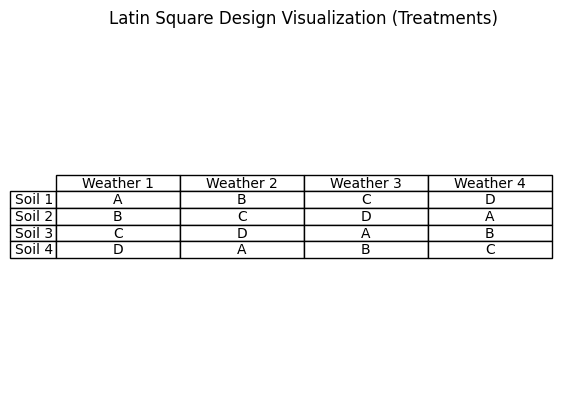

In [215]:
# Pivot the data to visualize the Latin square design
latin_square = df3.pivot(index='Row (Soil Type)', columns='Column (Weather Condition)', values='Treatment (Fertilizer)')

# Plot the Latin square design
fig, ax = plt.subplots()
ax.set_title("Latin Square Design Visualization (Treatments)")
ax.axis('tight')
ax.axis('off')
ax.table(cellText=latin_square.values, colLabels=latin_square.columns, rowLabels=latin_square.index, 
         cellLoc='center', loc='center')

plt.show()


**Latin Square Design with Growth values and Heat (*Optional* )**

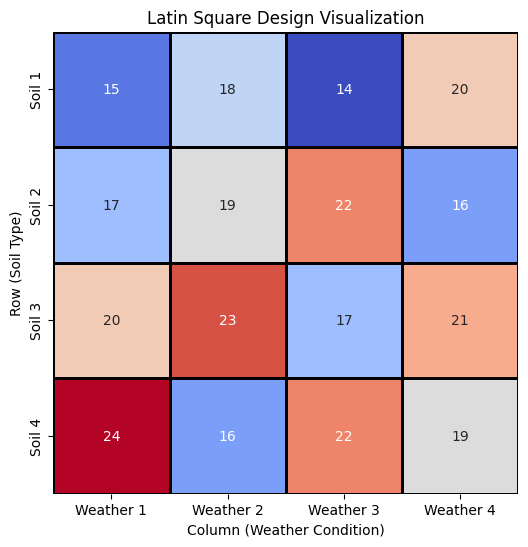

In [216]:
# Pivot the DataFrame to create the Latin Square layout
latin_square = df3.pivot(index='Row (Soil Type)', columns = 'Column (Weather Condition)', values='Growth (cm)')

# Visualize the Latin Square design including values
plt.figure(figsize=(6, 6))
sns.heatmap(latin_square, annot=True, cbar=False, cmap="coolwarm", linewidths=1, linecolor='black')
plt.title('Latin Square Design Visualization')
plt.xlabel('Column (Weather Condition)') # Use actual column names from df3
plt.ylabel('Row (Soil Type)') # Use actual column names from df3
plt.show()

b. What are the purposes of Latin Square Design to include Soil and Weather?

The Latin Square Design aims to control variability from two potential sources of experimental error, in this case, **soil type** and **weather conditions**.

By incorporating both as blocking factors, it ensures that the effect of the **treatment (fertilizer)** on **plant growth** is evaluated more accurately and consistently.

c. Run one-way ANOVA with this design and list the result in ANOVA table.

In [217]:
# Columns from Dataframe 3
df3['Growth'] = df3['Growth (cm)']
df3['Row'] = df3['Row (Soil Type)'].astype('category')
df3['Column'] = df3['Column (Weather Condition)'].astype('category')
df3['Treatment'] = df3['Treatment (Fertilizer)'].astype('category')

# Perform Latin Square ANOVA using a formula-based approach
model3 = ols('Growth ~ Row + Column + Treatment', data=df3).fit()

# Generate the ANOVA table
anova_table3 = sm.stats.anova_lm(model3, typ=2)

# Display the ANOVA table
anova_table3

,sum_sq,df,F,PR(>F)
Row,33.6875,3.0,4.244094,0.062607
Column,0.1875,3.0,0.023622,0.994559
Treatment,83.1875,3.0,10.480315,0.008443
Residual,15.8750,6.0,NaN,NaN


d. Interpret the result statistically.

**Interpretation:**

From the ANOVA table, we observe that the **treatment effect (Fertilizer)** is statistically significant with an **F-statistic** of **10.480315** and a p-value of **0.008443**, which is less than 0.05. This indicates that the different fertilizers **significantly impact** the outcome (e.g., crop yield).

On the other hand, the effect of **Row (Soil Type)** has a p-value of **0.062607**, which is slightly above 0.05, suggesting that soil type may have a marginally significant effect but **does not reach** conventional significance levels.

The **Column (Weather Condition)** has an F-statistic of **0.0236** and a p-value of **0.9946**, showing no significant impact on the outcome. Thus, fertilizers drive the significant differences, while soil type shows some influence, and weather condition has no significant effect.